<a href="https://colab.research.google.com/github/aliciamonteiro/Heuristicas/blob/main/Mochila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema da Mochila Inteira**
> O Problema da Mochila Inteira é um problema de otimização combinatória que busca selecionar um subconjunto de itens de um conjunto dado de forma que o valor total dos itens selecionados seja maximizado, sem que o peso total exceda a capacidade da mochila. Cada item tem um valor (ou lucro) e um peso, e cada item pode ser incluído ou não na solução (daí o "0-1" no nome).

**Histórico:** O Problema da Mochila Inteira foi formalizado pela primeira vez por George Dantzig em 1957, como parte de suas investigações sobre programação linear. Ele foi um dos primeiros problemas a ser estudado em programação inteira, que lida com soluções em que as variáveis de decisão devem ser inteiras. Este problema se tornou um marco em pesquisa operacional e é fundamental para entender algoritmos de otimização.









Exemplo: Imagine que você tem uma mochila que suporta até 15 kg e você possui 6 itens com os seguintes atributos:

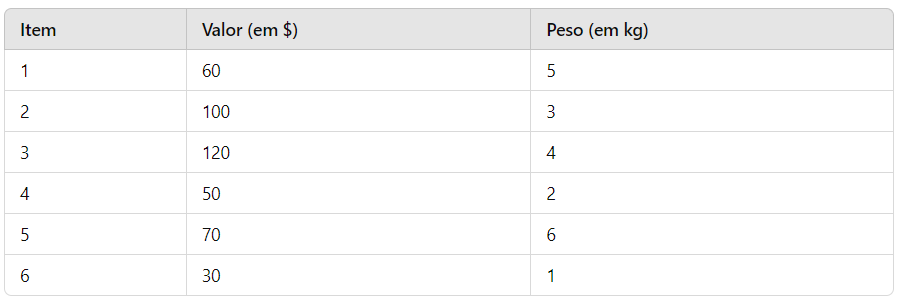

A questão é escolher quais itens colocar na mochila para maximizar o valor total sem ultrapassar a capacidade de 15 kg.

## O problema da mochila pode ser formulado como:



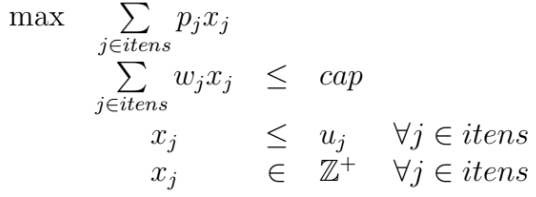

### Modelagem e resolução do problema






In [ ]:
%pip install gurobipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 63.5 MB/s eta 0:00:00


In [ ]:
import gurobipy as gp
from gurobipy import GRB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Função para carregar os dados do arquivo
def carregar_dados_arquivo(caminho_arquivo):
    with open(caminho_arquivo, 'r') as arquivo:
        linhas = arquivo.readlines()
        n_itens, capacidade = map(int, linhas[0].split())
        pesos = list(map(int, linhas[1].split()))
        valores = list(map(int, linhas[2].split()))
    return n_itens, capacidade, pesos, valores

# Substitua pelo caminho do arquivo no Drive
caminho_arquivo1 = "/content/drive/MyDrive/ATIVIDADE PRÁTICA II/Problema da Mochila inteira /Mochila_Inteira_OK/Mochila_01_OK.txt"
caminho_arquivo2 = "/content/drive/MyDrive/ATIVIDADE PRÁTICA II/Problema da Mochila inteira /Mochila_Inteira_OK/Mochila_01_OK.txt"
caminho_arquivo3 = "/content/drive/MyDrive/ATIVIDADE PRÁTICA II/Problema da Mochila inteira /Mochila_Inteira_OK/Mochila_01_OK.txt"

# Função para resolver e imprimir resultados para cada arquivo
def resolver_mochila(caminho_arquivo):
    # Carregar os dados do arquivo
    n_itens, capacidade, pesos, valores = carregar_dados_arquivo(caminho_arquivo)

    # Criar o modelo
    modelo = gp.Model("Problema_da_Mochila")

    # Definir o parâmetro para não mostrar o processo de resolução
    modelo.setParam(gp.GRB.Param.OutputFlag, 0)

    # Criar as variáveis (binárias para indicar seleção de itens)
    x = modelo.addVars(n_itens, vtype=GRB.BINARY, name="x")

    # Definir a função objetivo (maximizar o valor total dos itens na mochila)
    modelo.setObjective(gp.quicksum(valores[i] * x[i] for i in range(n_itens)), GRB.MAXIMIZE)

    # Adicionar a restrição de capacidade
    modelo.addConstr(gp.quicksum(pesos[i] * x[i] for i in range(n_itens)) <= capacidade, name = "restricao_capacidade")

    # Resolver o modelo
    modelo.optimize()

    # Mostrar apenas os resultados
    print(f"\n--- Resultados para {caminho_arquivo} ---")
    if modelo.status == GRB.OPTIMAL:
        print("\nItens selecionados para a mochila:")
        for i in range(n_itens):
            if x[i].x > 0.5:  # Se a variável binária é 1 (item selecionado)
                print(f" - Item {i+1} (Valor: {valores[i]}, Peso: {pesos[i]})")
        print(f"\nValor total da mochila: {modelo.objVal}")
    else:
        print("Não foi encontrada uma solução ótima.")

# Resolver para os três arquivos
resolver_mochila(caminho_arquivo1)
resolver_mochila(caminho_arquivo2)
resolver_mochila(caminho_arquivo3)


Restricted license - for non-production use only - expires 2026-11-23

--- Resultados para /content/drive/MyDrive/ATIVIDADE PRÁTICA II/Problema da Mochila inteira /Mochila_Inteira_OK/Mochila_01_OK.txt ---

Itens selecionados para a mochila:
 - Item 1 (Valor: 92, Peso: 44)
 - Item 3 (Valor: 43, Peso: 90)
 - Item 4 (Valor: 83, Peso: 72)
 - Item 5 (Valor: 84, Peso: 91)
 - Item 6 (Valor: 68, Peso: 40)
 - Item 7 (Valor: 92, Peso: 75)
 - Item 8 (Valor: 82, Peso: 35)
 - Item 10 (Valor: 44, Peso: 54)
 - Item 12 (Valor: 18, Peso: 40)
 - Item 13 (Valor: 56, Peso: 77)
 - Item 14 (Valor: 83, Peso: 15)
 - Item 15 (Valor: 25, Peso: 61)
 - Item 16 (Valor: 96, Peso: 17)
 - Item 17 (Valor: 70, Peso: 75)
 - Item 18 (Valor: 48, Peso: 29)
 - Item 20 (Valor: 58, Peso: 63)

Valor total da mochila: 1042.0

--- Resultados para /content/drive/MyDrive/ATIVIDADE PRÁTICA II/Problema da Mochila inteira /Mochila_Inteira_OK/Mochila_01_OK.txt ---

Itens selecionados para a mochila:
 - Item 1 (Valor: 92, Peso: 44)
 